## Background

This project will first use linear regression to find the best estimator generated data of a noisy sine wave and visualize the effects of overfitting and underfitting. 

The second part will be to train and visualize a KNN classifier from the Iris dataset provided by sklearn.

## 1.1 - Generate data for linear regression

The data should be a noisy version of a sin wave i.e
$y = \sin (x) + \epsilon $  where $\epsilon \sim \text{NormalDistribution}(\mu,\sigma)$.  Note $\epsilon$ should be different for every point.

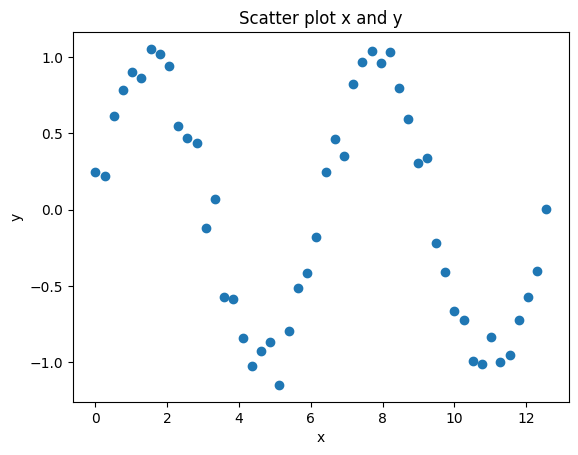

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, 4*np.pi, 50)
y = np.sin(x) + np.random.randn(50)*0.1
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot x and y')
plt.show()

## 1.2 - Fit the data
graph multiple linear regression attempts using different estimators to show underfitting and overfitting along with the best options.

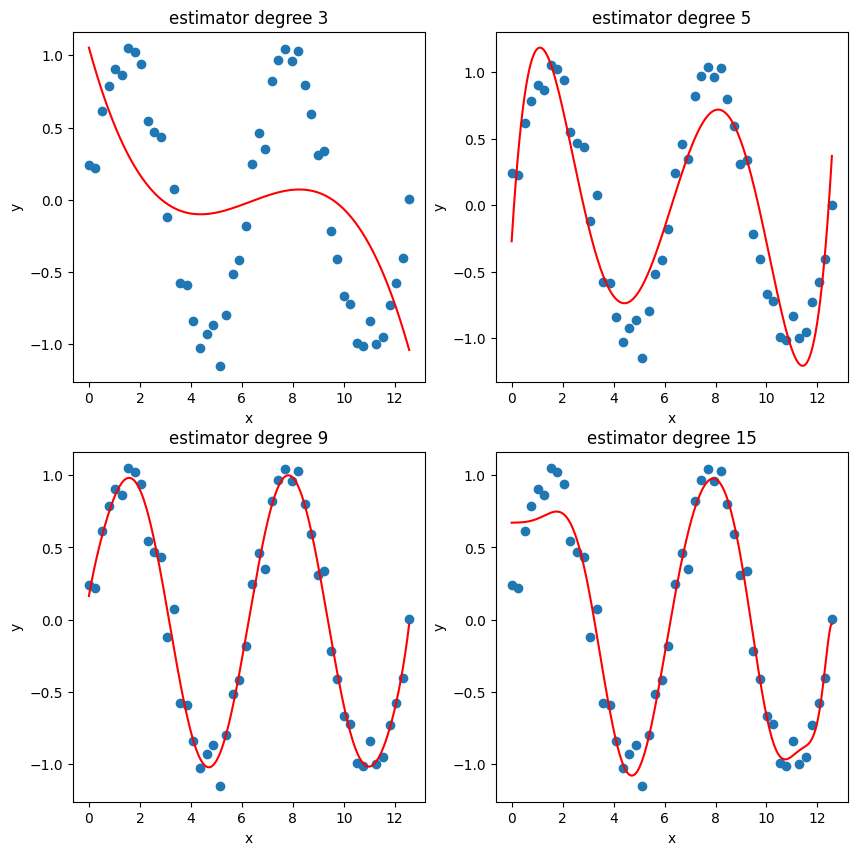

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

xfit = np.linspace(0, 4*np.pi, 1000)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.ravel()
for i, degree in enumerate([3, 5, 9, 15]):
  estimator = make_pipeline(PolynomialFeatures(degree), LinearRegression())
  estimator.fit(x[:,np.newaxis], y)
  yfit = estimator.predict(xfit[:, np.newaxis])
  ax[i].scatter(x, y)
  ax[i].plot(xfit, yfit, 'r')
  ax[i].set_xlabel('x')
  ax[i].set_ylabel('y')
  ax[i].set_title('estimator degree {0}'.format(degree))
plt.show()

## 2.1 - Load the iris dataset for KNN classification
This section will be to load the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) for a KNN classifier.

Create variables to store the following information:
1.  `X`: stores the first two features.
2.  `y`: stores all labels.
3.  `feature_names`: the meaning for the first two features.
4.  `target_names`: the meaning for each label.

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
feature_names = iris.feature_names[:2]
target_names = iris.target_names

print(f'X has the shape {X.shape}')
print(f'y has the shape {y.shape}')
print(f'X has features: {feature_names}')
print(f'y has labels: {target_names}')

X has the shape (150, 2)
y has the shape (150,)
X has features: ['sepal length (cm)', 'sepal width (cm)']
y has labels: ['setosa' 'versicolor' 'virginica']


## 2.2 - Train and visualize the KNN classifier
using K = 15 for this implementation


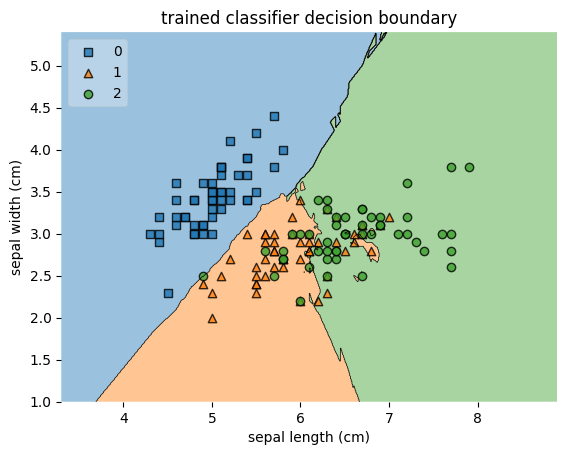

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

neigh = KNeighborsClassifier(n_neighbors = 15)
neigh.fit(X,y)

plot_decision_regions(X, y, clf = neigh, legend = 2)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('trained classifier decision boundary')
plt.show()

## 3.1 - load credit card fraud dataset for a KNN classifier
Use K-nearest-neighbor method to create a model that is able to detect potential credit card fraud.
In this project we are using a dataset that has the following features:  

V1 | V1 | ... | V10 | Amount | Class
---|---|---|---|---|---
(float)|(float)|(float)|(float)|(float)|(str)

The first ten features are the top PCA values for certain transaction information. The reason only PCA values are given is to protect private information.
The **Amount** feature is the amount of money in that particular transaction and the **Class** feature contains two classes **safe** and **Fraud**.

In [ ]:
# used only for the google colab environment
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

data = pd.read_csv('creditcard.csv')
X = data.drop(['Class'], axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scalar = StandardScaler()
labeler = LabelEncoder()
scalar.fit(X_train)
labeler.fit(y_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)
y_train = labeler.transform(y_train)
y_test = labeler.transform(y_test)


print(f'X_train has the shape {X_train.shape}')
print(f'y_train has the shape {y_train.shape}')
print(f'X_test has the shape {X_test.shape}')
print(f'y_test has the shape {y_test.shape}')
print(f'X_train mean is {np.mean(X_train, axis=0)}')
print(f'X_test mean is {np.mean(X_test, axis=0)}')
print(f'Sum of X_train mean is {np.sum(np.mean(X_train, axis=0))}')
print(f'Sum of X_test mean is {np.sum(np.mean(X_test, axis=0))}')

X_train has the shape (640, 11)
y_train has the shape (640,)
X_test has the shape (160, 11)
y_test has the shape (160,)
X_train mean is [-4.44089210e-17 -6.93889390e-18  3.33066907e-17  1.66533454e-17
  1.94289029e-17  1.66533454e-17 -3.46944695e-17 -1.94289029e-17
 -4.44089210e-17  0.00000000e+00  7.63278329e-18]
X_test mean is [ 0.09347451 -0.09182168  0.15245938 -0.19522097  0.10599188  0.23410519
  0.09620048 -0.19714382  0.18255422  0.17135069  0.12558944]
Sum of X_train mean is -5.620504062164857e-17
Sum of X_test mean is 0.6775393249086965


## 3.2 - Find the optimal KNN estimator
Find the optimal parameters of the KNN estimator using cross validation, and provide a final estimate of the model's generalization performance via the test set.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors': [1,3,5,7,9,11],
    'weights' : ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
}

# use GridSearchCV to find the best parameters for KNN
KNN_GV = GridSearchCV(KNeighborsClassifier(), grid_params, cv = 5)
KNN_GV.fit(X_train, y_train)

print(f'The best parameters are {KNN_GV.best_params_}')
print(f'The best accuracy on the training data is {KNN_GV.score(X_train, y_train)}')
print(f'The best accuracy on the testing data is {KNN_GV.score(X_test, y_test)}')

The best parameters are {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
The best accuracy on the training data is 0.953125
The best accuracy on the testing data is 0.90625
